In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
V = analysis.get_hypervolume()
mom_list = analysis.get_mom_list()
prop_mom_list = analysis.get_prop_mom_list()

## Test through the operator code

In [3]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
# job_num = 16142
job_num = 16583
base = './output/' + cfgbase + '_' + str(job_num)

In [4]:
μ, σ = analysis.test_analysis_propagators(base)

Computing for momentum index 0
Computing for momentum index 1
Computing for momentum index 2


<IPython.core.display.Javascript object>


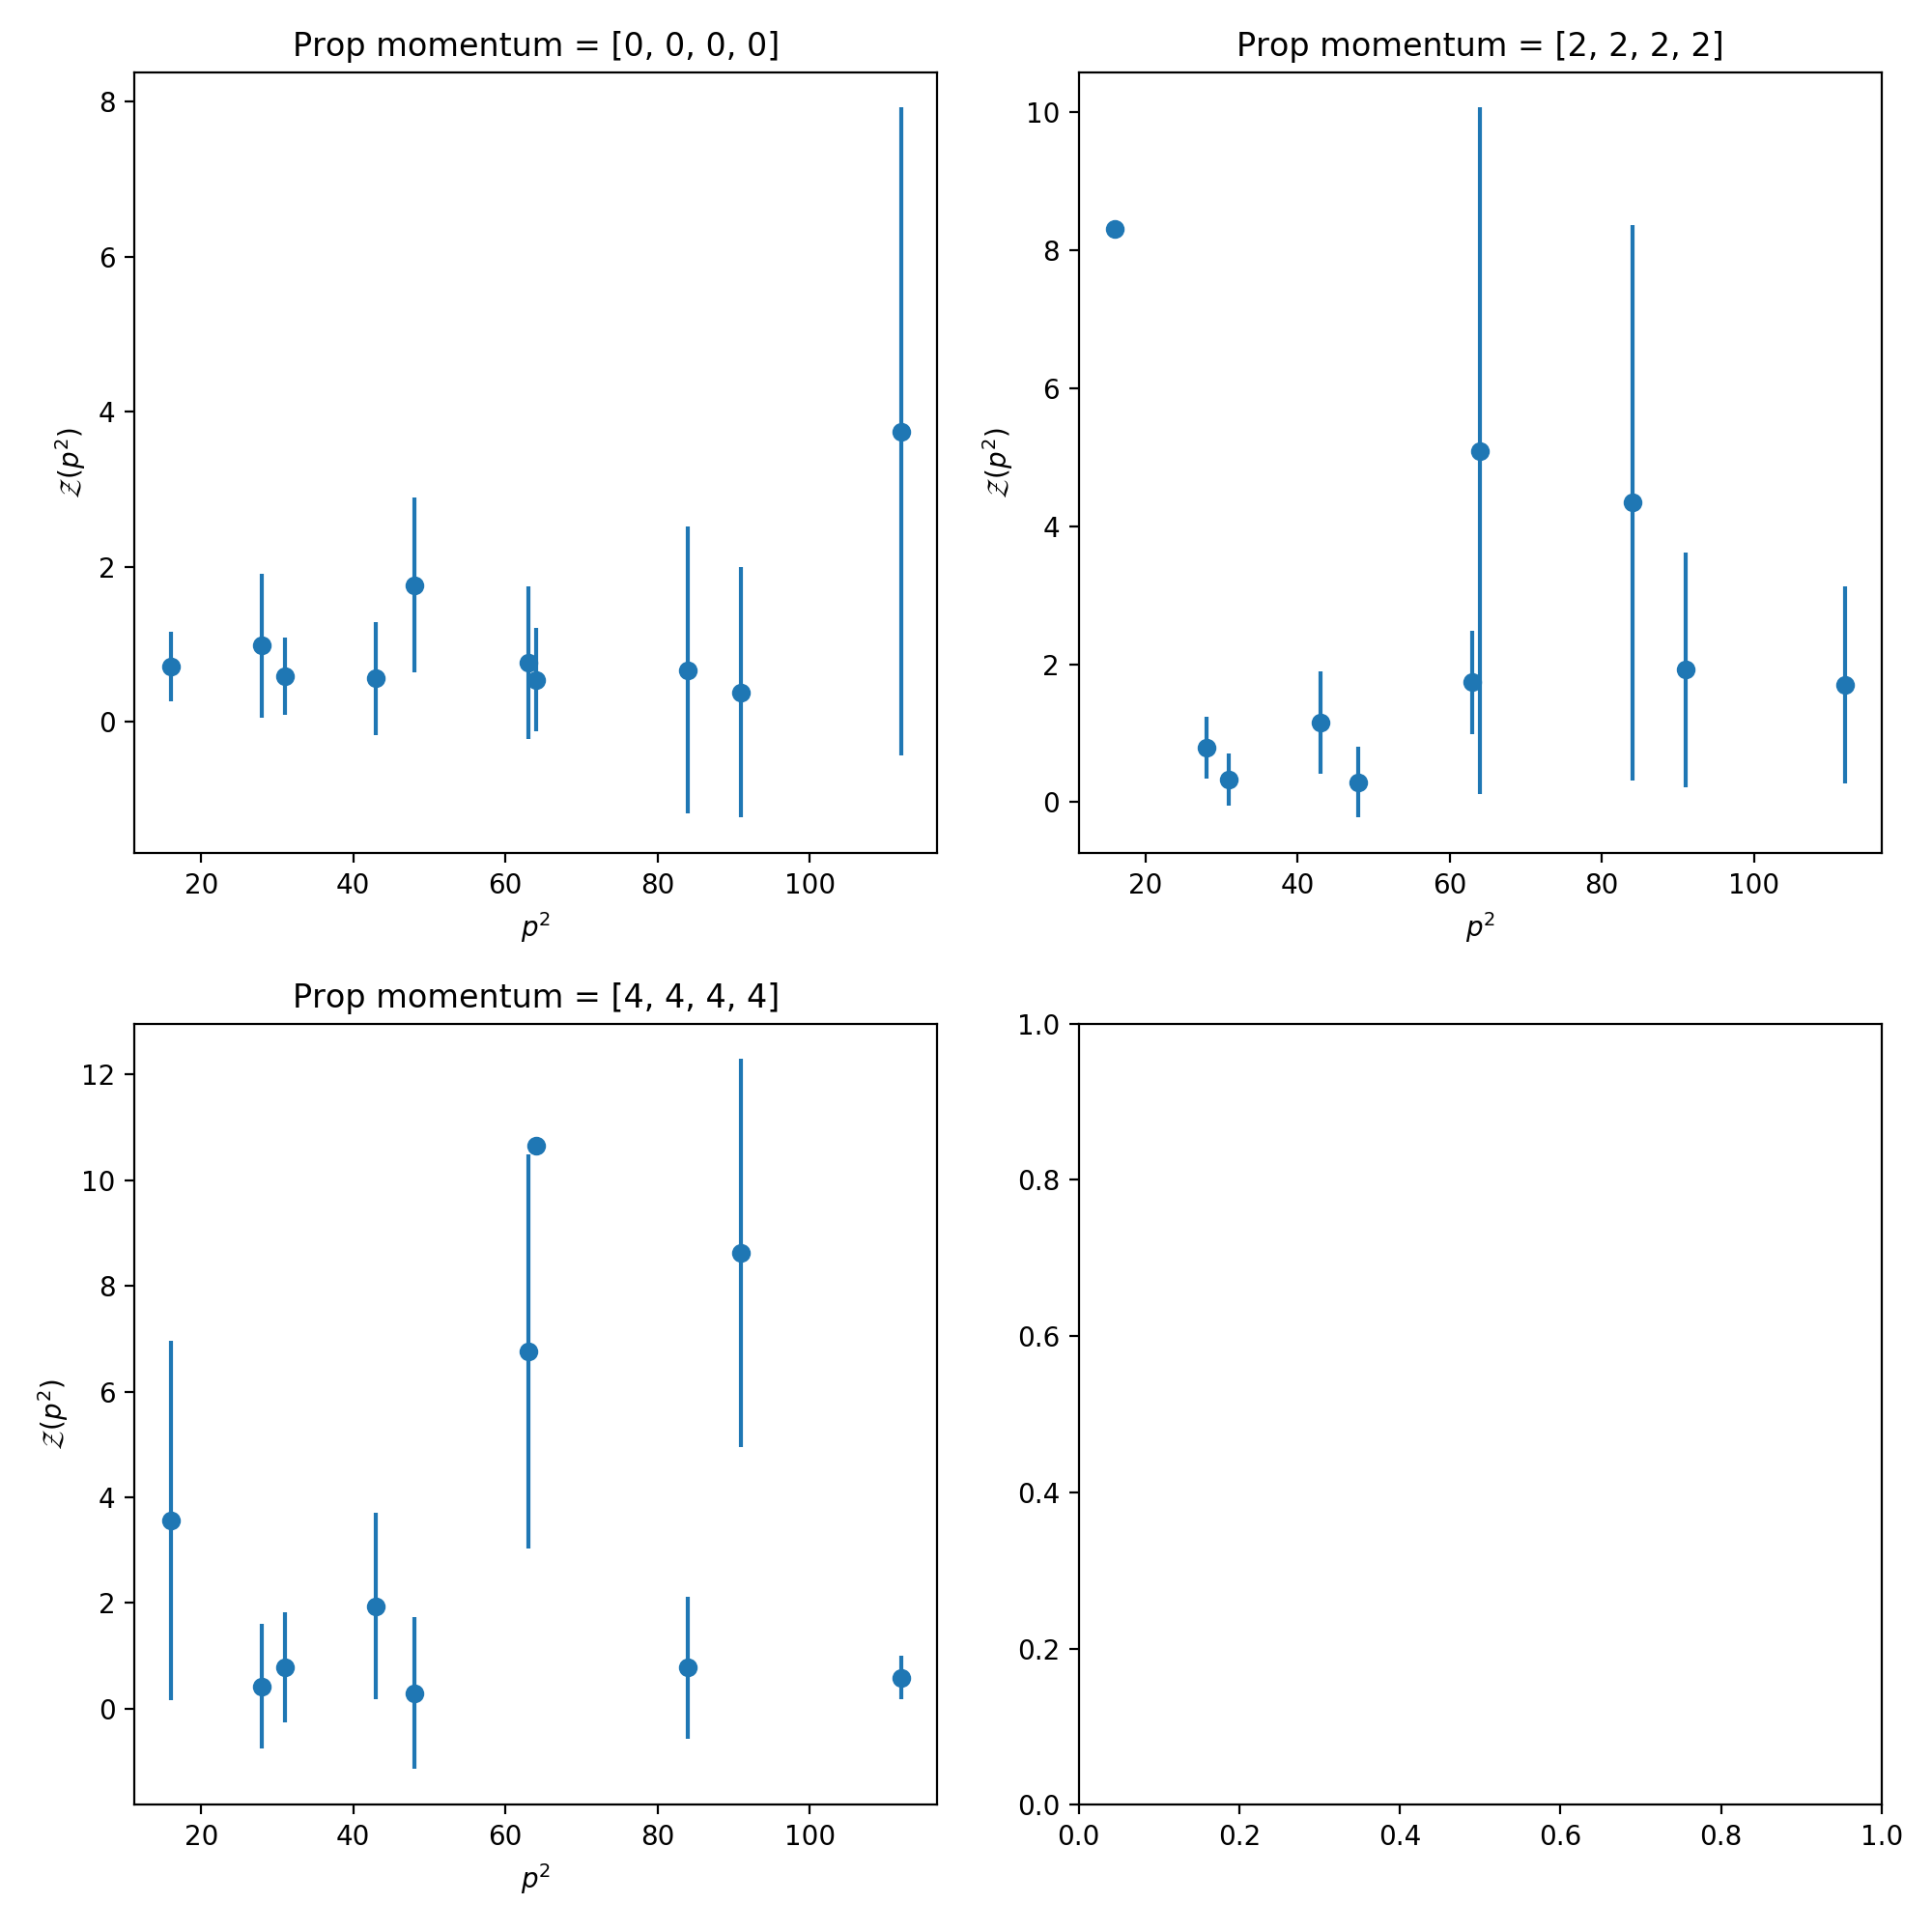

In [5]:
μ_list, σ_list = [], []
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax = ax.flatten()
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
for idx in range(len(analysis.prop_mom_list)):
    μ_list.append(np.array([μ[idx][analysis.plist_to_string(p)] for p in mom_list]))
    σ_list.append(np.array([σ[idx][analysis.plist_to_string(p)] for p in mom_list]))
    ax[idx].errorbar(p_squared, np.abs(μ_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o')
    ax[idx].set_xlabel('$p^2$')
    ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
    ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
# plt.title('Renormalization of quark operator')
plt.show()

In [6]:
for p, psquared in zip(mom_list, p_squared):
    print(p, psquared)

[2, 2, 2, 2] 16
[2, 2, 2, 4] 28
[2, 2, 2, 6] 48
[3, 3, 3, 2] 31
[3, 3, 3, 4] 43
[3, 3, 3, 6] 63
[3, 3, 3, 8] 91
[4, 4, 4, 4] 64
[4, 4, 4, 6] 84
[4, 4, 4, 8] 112


<IPython.core.display.Javascript object>


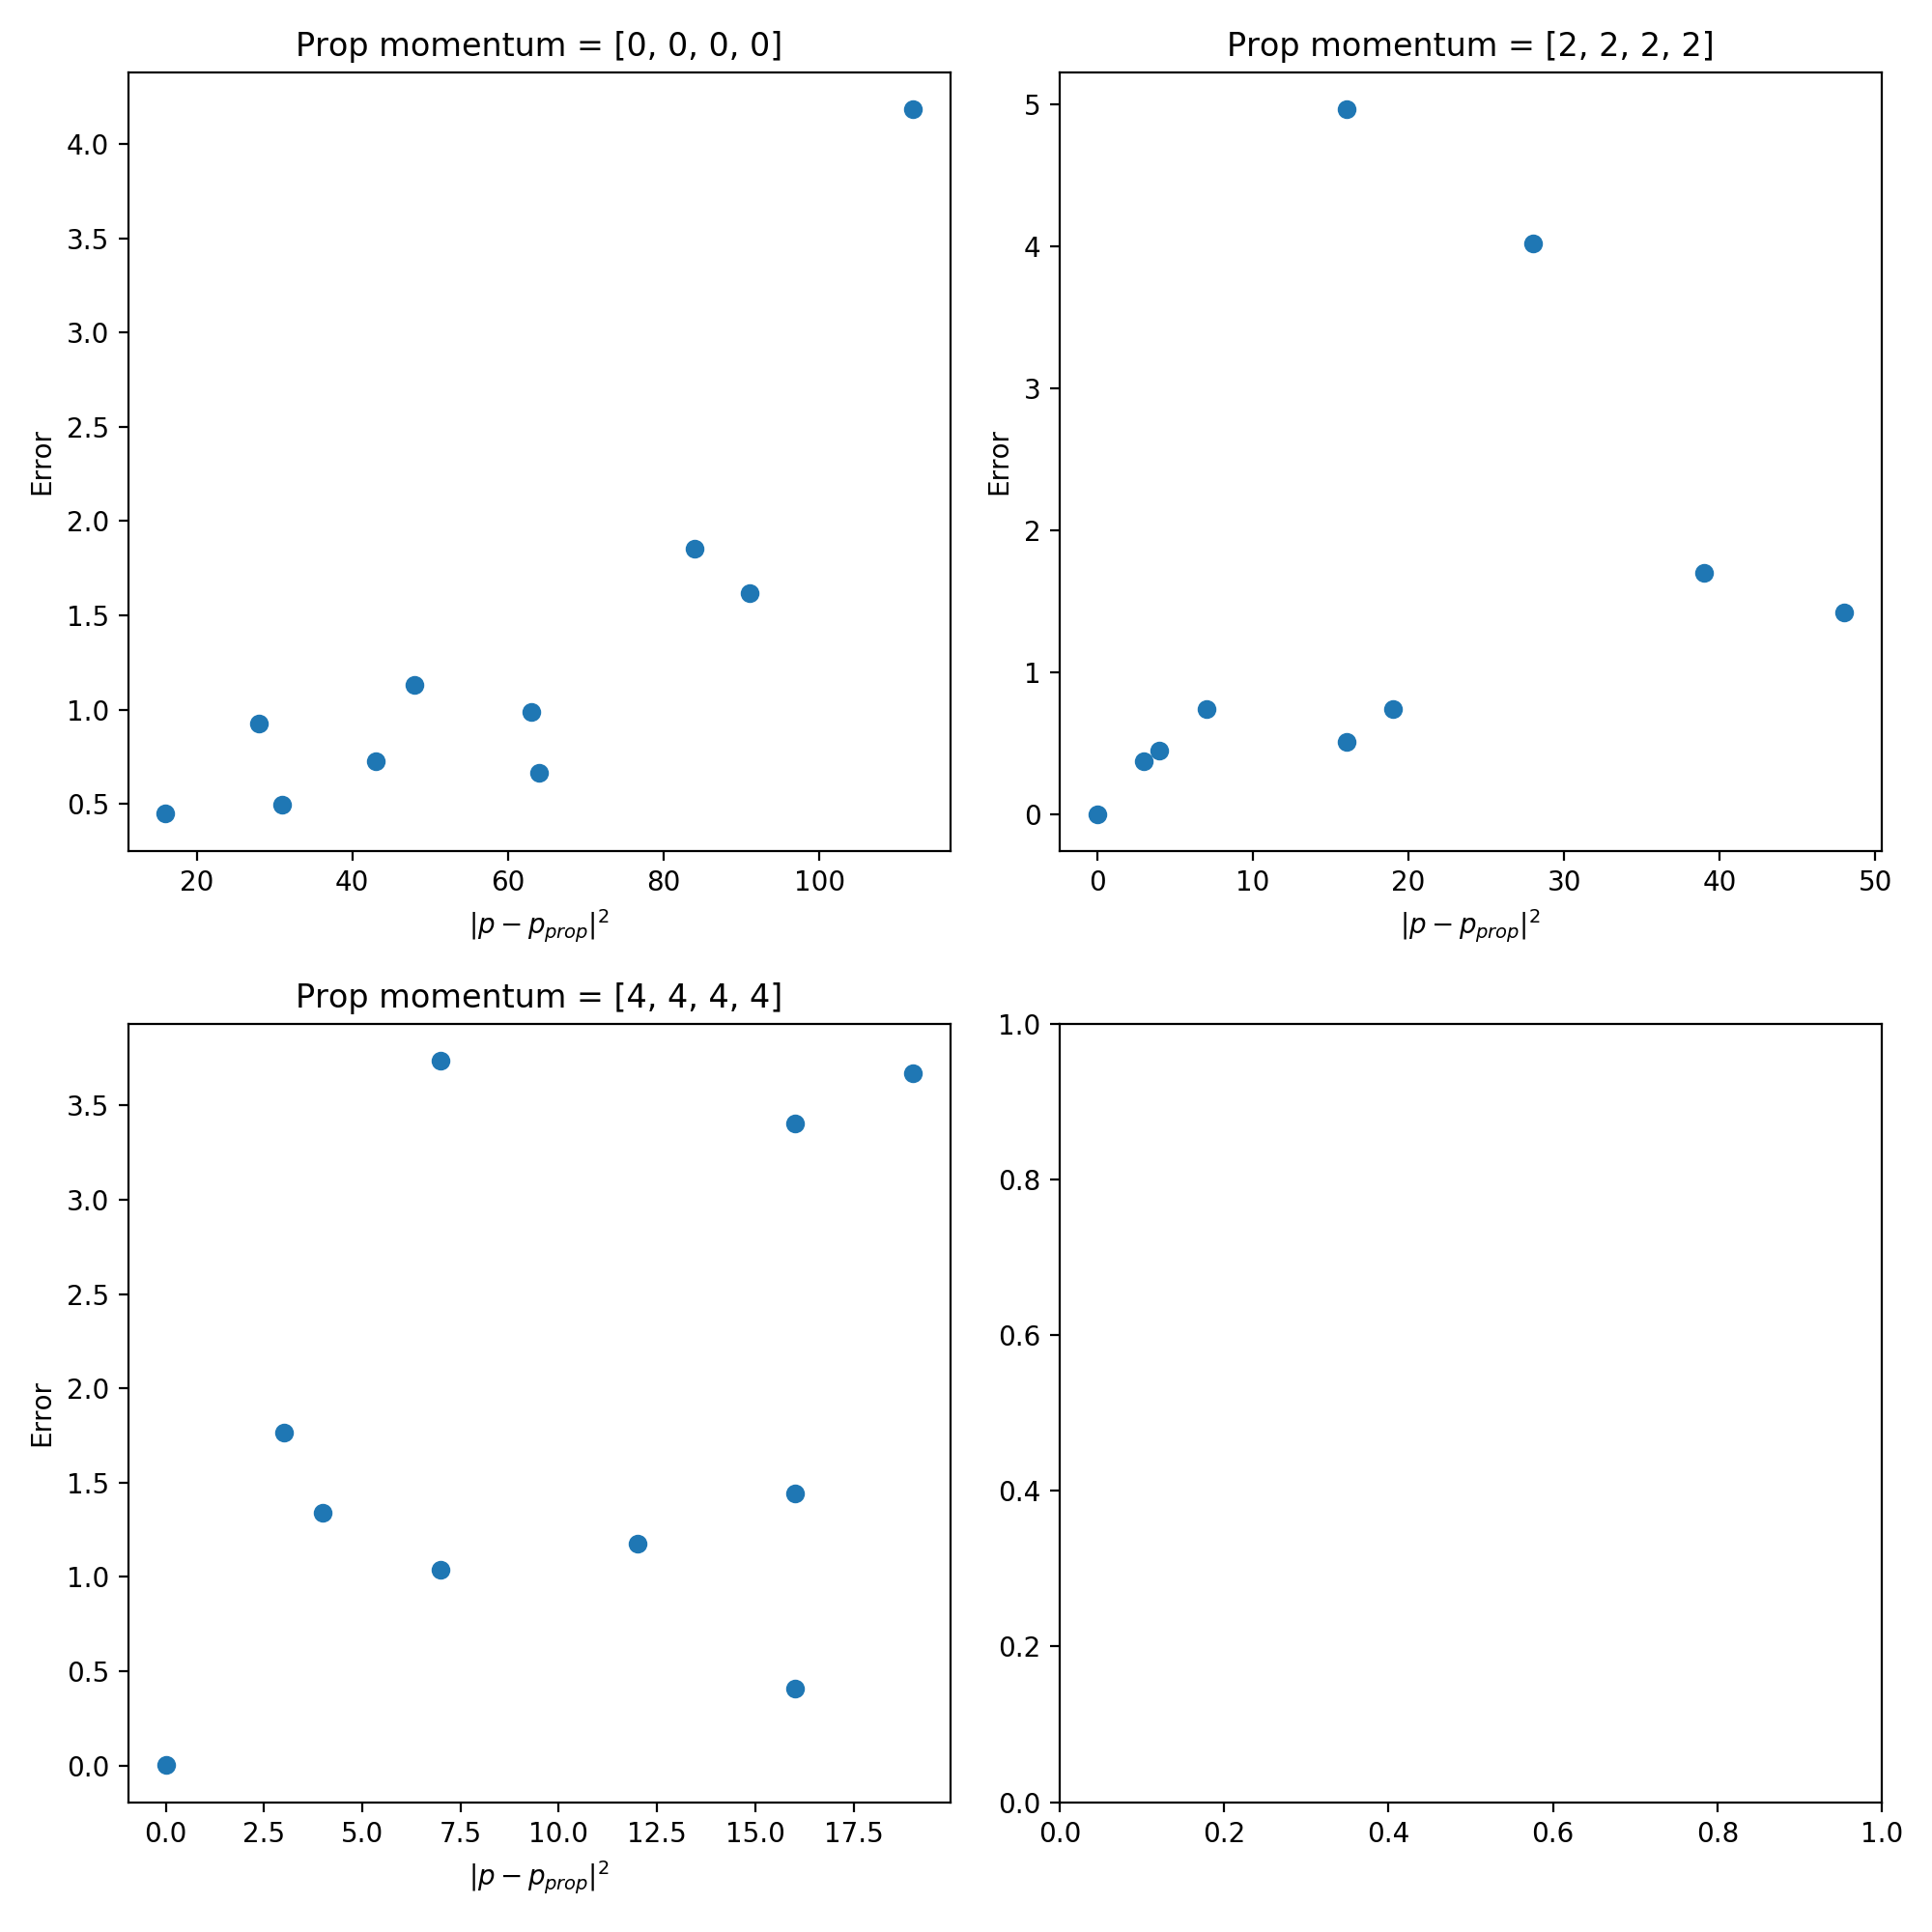

In [7]:
# TODO Error as a function of radius
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f1, ax1 = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax1 = ax1.flatten()
for idx, mom in enumerate(prop_mom_list):
    rsquared = [analysis.square(np.array(p) - np.array(mom)) for p in mom_list]
    ax1[idx].scatter(rsquared, σ_list[idx])
    ax1[idx].set_xlabel('$|p - p_{prop}|^2$')
    ax1[idx].set_ylabel('Error')
    ax1[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
plt.show()

## Other testing code

In [ ]:
base = '/Users/theoares/lqcd/npr_momfrac/output/through_operator_test/job'
# jobid = 16256    # this had sequential matrix element = (FT_neg * M):sum()
jobid = 16397
file = base + str(jobid) + '.h5'
f = h5py.File(file, 'r')

O11_op = f['O_operator11/p2222/cfg200'][()]
O22_op = f['O_operator22/p2222/cfg200'][()]
O33_op = f['O_operator33/p2222/cfg200'][()]
O44_op = f['O_operator44/p2222/cfg200'][()]

# O11_op_pos = f['O_operator_pos11/p2222/cfg200'][()]
# O22_op_pos = f['O_operator_pos22/p2222/cfg200'][()]
# O33_op_pos = f['O_operator_pos33/p2222/cfg200'][()]
# O44_op_pos = f['O_operator_pos44/p2222/cfg200'][()]

O11_op_pos = f['O_operator_adj11/p2222/cfg200'][()]
O22_op_pos = f['O_operator_adj22/p2222/cfg200'][()]
O33_op_pos = f['O_operator_adj33/p2222/cfg200'][()]
O44_op_pos = f['O_operator_adj44/p2222/cfg200'][()]

O11_op_seq = f['O_sequential11/p2222/cfg200'][()]
O22_op_seq = f['O_sequential22/p2222/cfg200'][()]
O33_op_seq = f['O_sequential33/p2222/cfg200'][()]
O44_op_seq = f['O_sequential44/p2222/cfg200'][()]

S_op = f['prop_operator/p2222/cfg200'][()]
# S_op_neg = f['prop__operator_neg/p2222/cfg200'][()]

# Ground truth
O11 = f['O11/p2222/cfg200'][()]
O22 = f['O22/p2222/cfg200'][()]
O33 = f['O33/p2222/cfg200'][()]
O44 = f['O44/p2222/cfg200'][()]
S = f['prop/p2222/cfg200'][()]

In [ ]:
antiprop_zero = f['antiprop_zero/p2222/cfg200'][()]

In [ ]:
print(antiprop_zero[0, 0, 0, :])

In [ ]:
print(S[0, 0, 0, :] / V)
print(S_op[0, 0, 0, :])

In [ ]:
print(O11[0, 0, 0, :])
print(O11_op_seq[0, 0, 0, :])  # these should be the same. Want to make it so that the bottom two are also the same

print(O11_op[0, 0, 0, :])
print(O11_op_pos[0, 0, 0, :])

## Check to see if Z is the same

In [ ]:
plist = [[2, 2, 2, 2]]
analysis.set_mom_list(plist)

In [ ]:
props1 = {}
threepts1 = {}
props1['p2222'] = np.array([np.einsum('ijab->aibj', S)])
threepts1['p2222'] = np.array([np.einsum('ijab->aibj', O33)])
props_boot1 = analysis.bootstrap(props1, seed = 0)
threept_boot1 = analysis.bootstrap(threepts1, seed = 0)

props_inv1 = analysis.invert_prop(props_boot1)
Γ1 = analysis.amputate(props_inv1, threept_boot1)
Zq1 = analysis.quark_renorm(props_inv1)
Γ_B, Γ_B_inv = analysis.born_term()
# TODO what happens if I don't invert Γ_B?
# Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
Z1 = analysis.get_Z(Zq1, Γ1, Γ_B)
print(Z1)

In [ ]:
props2 = {}
threepts2 = {}
props2['p2222'] = np.array([np.einsum('ijab->aibj', S_op)])
threepts2['p2222'] = np.array([np.einsum('ijab->aibj', O33_op_pos)])
props_boot2 = analysis.bootstrap(props2, seed = 0)
threept_boot2 = analysis.bootstrap(threepts2, seed = 0)

props_inv2 = analysis.invert_prop(props_boot2)
Γ2 = analysis.amputate(props_inv2, threept_boot2)
Zq2 = analysis.quark_renorm(props_inv2)
Z2 = analysis.get_Z(Zq2, Γ2, Γ_B)
print(Z2)

## p2222 on configuration 200

In [ ]:
# file = '/Users/theoares/lqcd/npr_momfrac/output/p2222_cfg200/p2222_periodicbc_cfg200.h5'
file = '/Users/theoares/lqcd/npr_momfrac/output/p2222_cfg200/p2222_cfg200.h5'
# file = '/Users/theoares/lqcd/npr_momfrac/output/p2222_cfg200/job15890_cfg200.h5'
f = h5py.File(file, 'r')
O11 = f['O11/p2222/cfg200'][()] / V
O22 = f['O22/p2222/cfg200'][()] / V
O33 = f['O33/p2222/cfg200'][()] / V
O44 = f['O44/p2222/cfg200'][()] / V
S = f['prop/p2222/cfg200'][()] / V
S = np.einsum('ijab->abij', S)
O11 = np.einsum('ijab->abij', O11)
O22 = np.einsum('ijab->abij', O22)
O33 = np.einsum('ijab->abij', O33)
O44 = np.einsum('ijab->abij', O44)
# G = np.einsum('ijab->abij', f['threept/p2222/cfg200'][()])
# Sprime = f['propprime/p2222/cfg200'][()]
# Gprime = f['threeptprime/p2222/cfg200'][()]

In [ ]:
S[0, 0, :, 1]

In [ ]:
O44[0, 0, :, 0]

## Other testing code

In [ ]:
# # Run to determine the difference in observables after gauge transformation.
# file = '/Users/theoares/lqcd/npr_momfrac/testing/output/cl3_16_48_b6p1_m0p2450_14503/cfg200.h5'
# f = h5py.File(file, 'r')
# propprime_p2222 = f['propprime/p2222/cfg200'][()]
# prop_p2222 = f['prop/p2222/cfg200'][()]
# delta = prop_p2222 - propprime_p2222
# scale = np.abs(prop_p2222[0, 0, 0, 0])
# print(np.max(delta / scale)) # first order entries are of size 10^4

In [ ]:
# file = '/Users/theoares/lqcd/npr_momfrac/examples/analysis_EXAMPLE_output.h5'
# f = h5py.File(file, 'r')
# S = f['prop/p2222'][()]

In [ ]:
# #confirm 2 point function is the same as Phiala's (it is)
# file = '/Users/theoares/lqcd/npr_momfrac/examples/meas/cl3_16_48_b6p1_m0p2450/pion_beam_npr_matrix_200.h5'
# f = h5py.File(file, 'r')
# S = f['prop/p2222'][()]

# file1 = '/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_14779/cfg200.h5'
# f1 = h5py.File(file1, 'r')
# S1 = f1['prop/p2222/cfg200'][()]

# print(S - S1)

In [ ]:
# tr1 = np.einsum('aiaj->ij', props['p2222'][0])
# tr2 = np.einsum('aiaj->ij', props1['p2222'][0])
# tr1[np.abs(tr1) < 10] = 0
# tr2[np.abs(tr2) < 10] = 0
# print(tr1)
# print(tr2)